[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/seoul-bike-analysis/blob/master/seoul-bike-station-location.ipynb)

# 따릉이 자전거 대여소 위치
* 크롤링한 전체 대여소 위치를 분석해 봅니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns

# 정규표현식 사용을 위해
import re

In [3]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium
# 지도 표현을 위해
import folium

## 한글폰트 설정

In [4]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

%matplotlib inline

## Colab 에서 실행을 위한 코드
* colab : https://colab.research.google.com/github/corazzon/seoul-bike-analysis/blob/master/seoul-bike-station-location.ipynb
* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리한다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러온다.

In [9]:
##나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
#fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [10]:
# 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 한다.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# PyDrive client 인증
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [11]:
# 공유 가능한 링크로 파일 가져오기
url ='https://drive.google.com/open?id=1PbU3obWSNc7ADD2sAF2Anhb9HYH8JsDL'
id = url.split('=')[1]
print(id)
downloaded = drive.CreateFile({'id':id})
# data폴더에 데이터를 따로 모아 관리한다.
%mkdir data
downloaded.GetContentFile('data/seoul_bike_station.csv')

1PbU3obWSNc7ADD2sAF2Anhb9HYH8JsDL


## 파일로드

In [12]:
df = pd.read_csv('data/seoul_bike_station.csv')
df.shape

(1529, 7)

In [13]:
df.dtypes

대여소번호    float64
대여소       object
거치대수       int64
상태        object
주소        object
위도       float64
경도       float64
dtype: object

In [14]:
# head 로 미리보기를 합니다. 기본값은 5입니다.
df.head()

대여소번호                  대여소  거치대수   상태                            주소  \
0  1001.0  광진교 남단 사거리(디지털프라자앞)    15  운영중  서울특별시 강동구 구천면로 171 376 남단사거리   
1  1002.0            해공공원(천호동)    10  운영중        서울특별시 강동구 올림픽로 702 265   
2  1003.0               해공도서관앞    20  운영중        서울특별시 강동구 올림픽로 702 367   
3  1004.0       삼성광나루아파트 버스정류장    10  운영중    서울특별시 강동구 상암로3길 77 암사동 534   
4  1006.0           롯데캐슬 115동앞    15  운영중   서울특별시 강동구 양재대로 1665 명일동 304   

          위도          경도  
0  37.541805  127.124718  
1  37.545219  127.125916  
2  37.543915  127.125458  
3  37.553349  127.128860  
4  37.554920  127.142799

In [15]:
# tail로 미리보기를 합니다. 기본값은 5입니다.
df.tail()

대여소번호          대여소  거치대수   상태                                       주소  \
1524   971.0  역촌 센트레빌 아파트    10  운영중  서울특별시 은평구 갈현로3나길 23 역촌 센트레빌 아파트 107동 인근   
1525   972.0          수색역    20  운영중                    서울특별시 은평구 수색로 261 수색역   
1526  9996.0          시설2     1  운영중      서울특별시 성동구 청계천로 540 서울시설공단 공공자전거 운영처   
1527     NaN          위트콤    14  운영중                    서울특별시 서초구 방배로 110 위트콤   
1528     NaN        위트콤공장    66  운영중                서울특별시 서초구 방배로 110 석교빌딩 4층   

             위도          경도  
1524  37.602329  126.906548  
1525  37.582161  126.894928  
1526   0.000000    0.000000  
1527   0.000000    0.000000  
1528   0.000000    0.000000

In [16]:
# info를 사용하면 데이터의 타입, 크기, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   1527 non-null   float64
 1   대여소     1529 non-null   object 
 2   거치대수    1529 non-null   int64  
 3   상태      1529 non-null   object 
 4   주소      1529 non-null   object 
 5   위도      1529 non-null   float64
 6   경도      1529 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.7+ KB


In [17]:
# 결측치를 봅니다.
df.isnull().sum()

대여소번호    2
대여소      0
거치대수     0
상태       0
주소       0
위도       0
경도       0
dtype: int64

In [18]:
# 데이터프레임의 행과 열의 갯수를 출력합니다.
df.shape

(1529, 7)

In [19]:
# value_counts 를 하게 되면 그룹화 된 데이터의 갯수를 세어줍니다.
df['상태'].value_counts()

상태
운영중    1529
Name: count, dtype: int64

In [20]:
# 연산을 통해 위도가 37보다 크고, 경도가 125 보다 큰 값을 가져옵니다.
# 위도와 경도가 잘못 들어가 있는 값을 제거하고 가져오기 위함입니다.
geo_df = df.loc[(df['위도'] > 37) & (df['경도'] > 125)]
geo_df.shape

(1524, 7)

<Axes: xlabel='경도', ylabel='위도'>

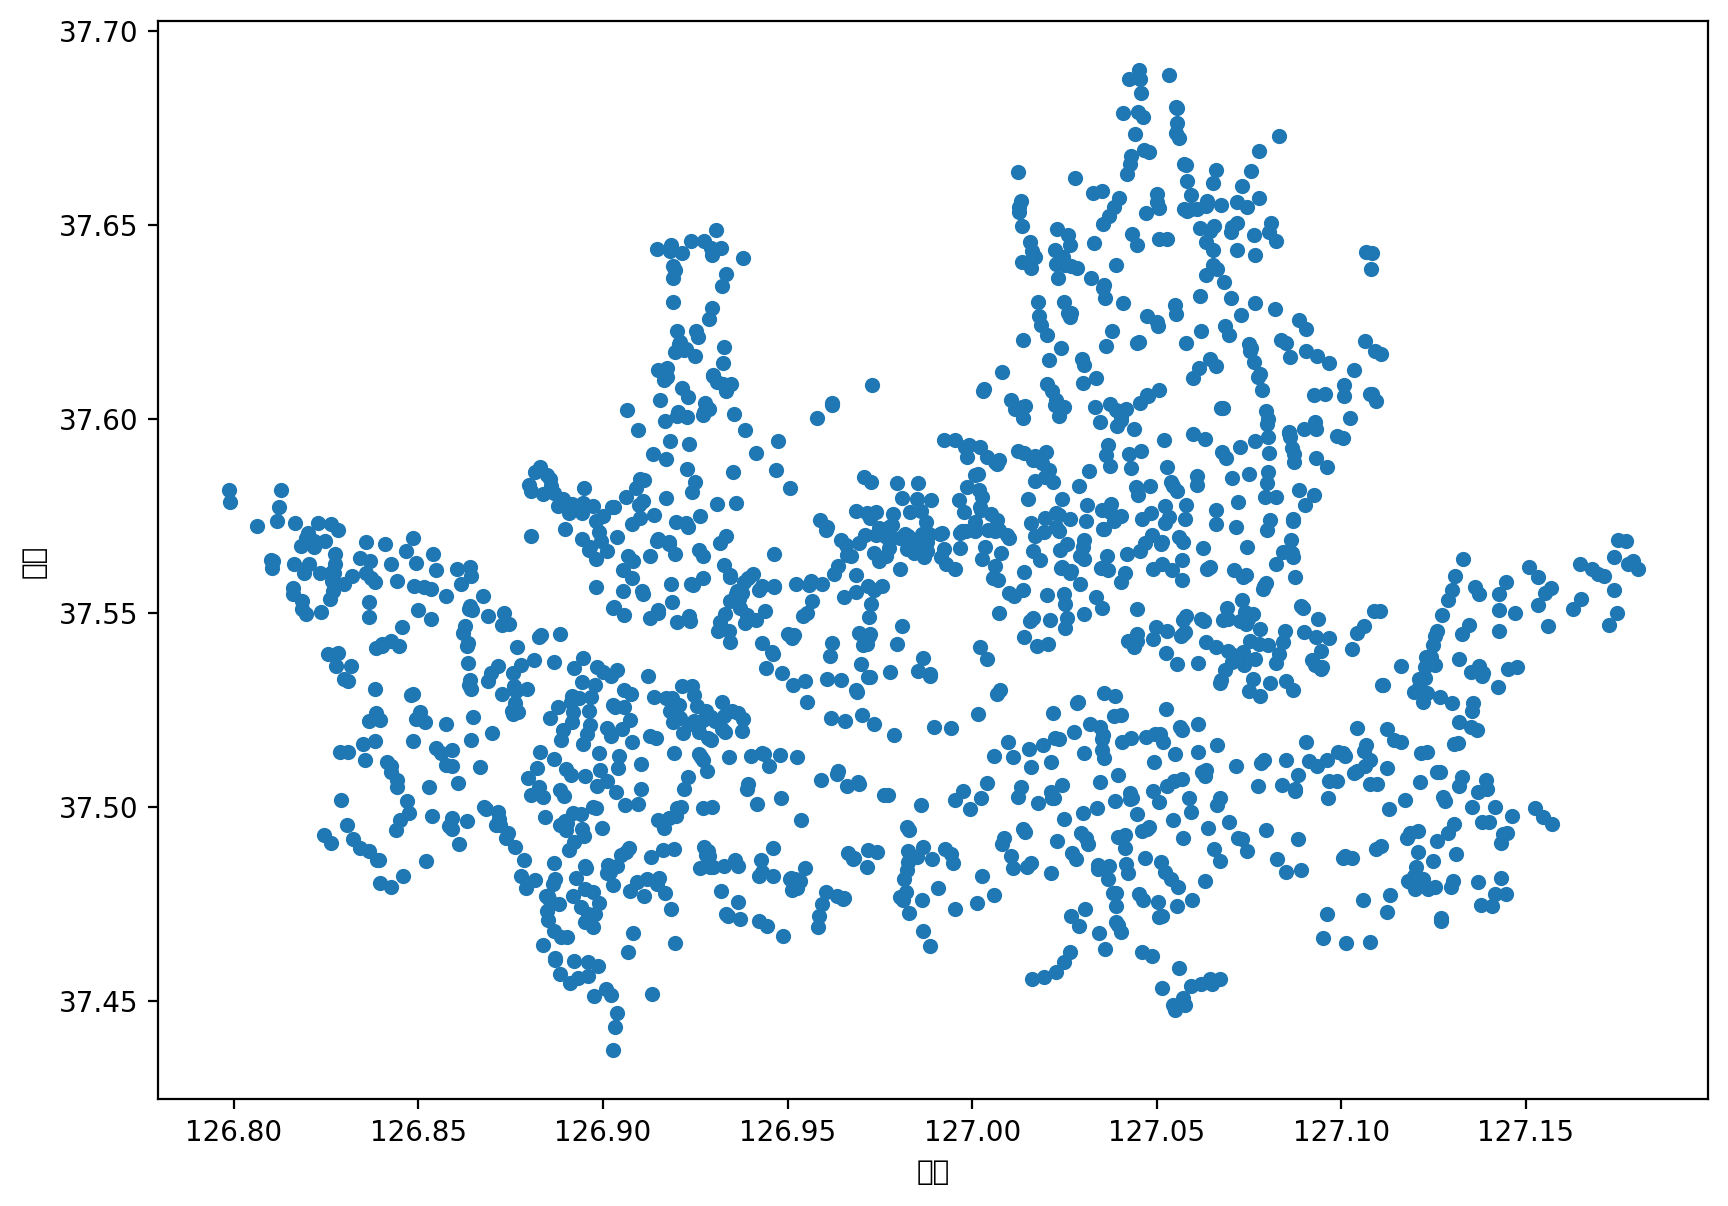

In [21]:
# Pandas의 scatter plot으로 시각화를 합니다.
geo_df.plot.scatter(x='경도', y='위도', figsize=(10, 7))

<Axes: xlabel='경도', ylabel='위도'>

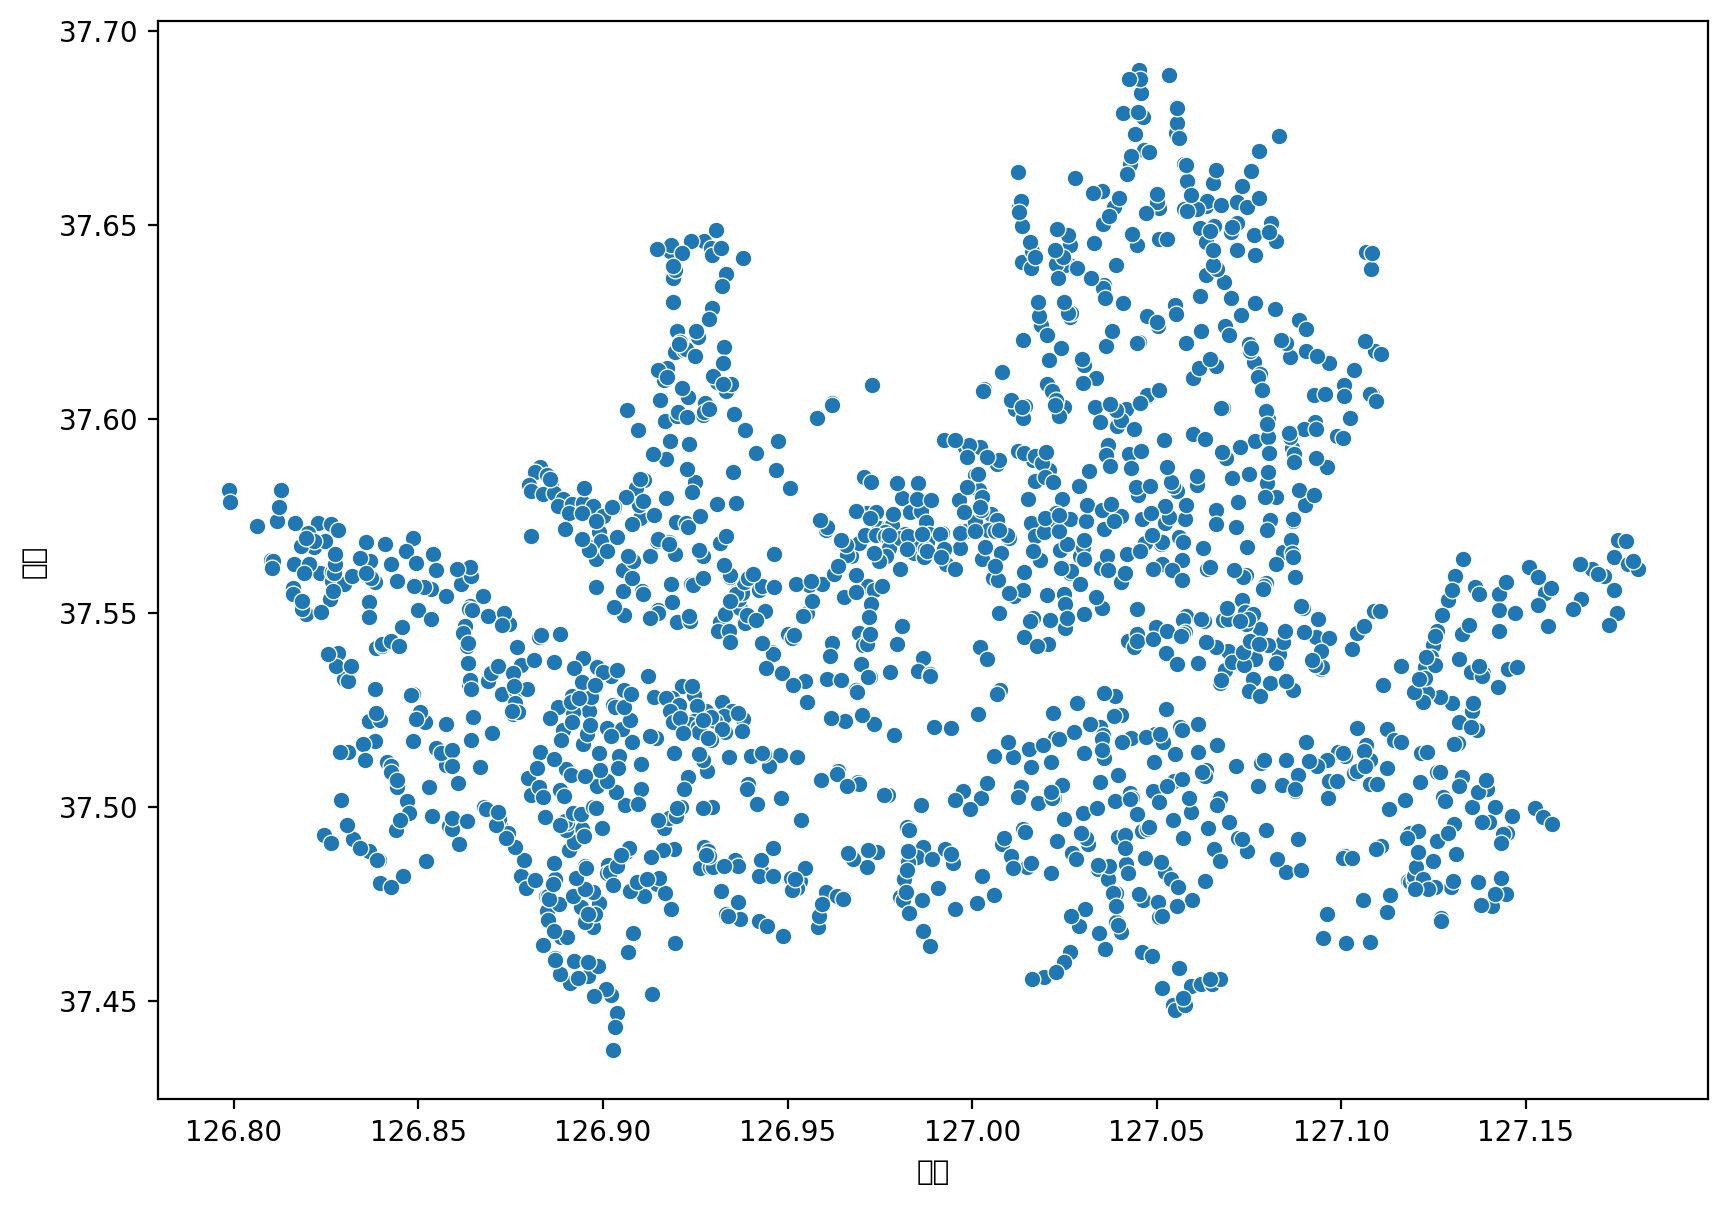

In [22]:
# 위와 같은 그래프이지만 seaborn 으로 시각화를 합니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(data=geo_df, x="경도", y="위도")

## 구별 데이터 만들기
* 공백으로 문자를 분리해서 1번째 인덱스에 있는 문자를 가져오도록 구를 생성하였다.
* 그런데 두 번째 문자가 구가 아닌 경우가 있다.
* 이런 문자들을 개선하기 위해 공백 두 개는 하나로 변경하였다.
* 문자 앞 뒤에 공백문자가 들어가 있는 것을 strip()으로 제거한다.
* 그래도 두 번째 문자가 구가 아닌 문자들이 있다. 해당 문자들만 모아서 '구' 컬럼에 행정구가 들어갈 수 있도록 전처리 작업을 해준다.

In [23]:
df['주소'] = df['주소'].apply(lambda x : re.sub('  ', ' ', x))

In [24]:
df['구'] = df['주소'].apply(lambda x : x.strip().split(' ')[1])

In [25]:
df['구'].value_counts().head()

구
강남구     100
송파구      97
영등포구     90
강서구      84
마포구      77
Name: count, dtype: int64

In [26]:
df['구'].value_counts().tail()

구
서울      1
양재대로    1
길동      1
상일동     1
갈현동     1
Name: count, dtype: int64

* 마지막 글자가 구로 끝나지 않는 데이터를 찾아온다.
* 마지막 글자를 찾을 때는 -1로 마지막 위치의 문자를 가져올 수도 있지만
* endswith를 사용해 가져오도록 한다.

In [27]:
# str 메소드를 사용해서 마지막 인덱스로 끝나는 글자를 가져올 수도 있지만 endswith 를 사용할 수도 있다.
# df_gu = df[df['구'].str[-1] != '구']
df_gu = df[~df['구'].str.endswith('구')]
print(df_gu.shape)
df_gu2 = df_gu['구'].unique()
df_gu2

(63, 8)


array(['성내동', '상일동', '명일동', '길동', '암사동', '고덕동', '강일동', '양재대로', '서울',
       '중화동', '면목동', '상봉동', '미아동', '수유동', '번동', '동일로', '창동', '망원2빗물펌프장',
       '가산동', '시흥동', '독산동', '사당동', '관악로', '서초동', '잠원동', '신원동', '양재동',
       '염곡동', '상암동', '진관동', '응암동', '녹번동', '불광로', '불광동', '증산동', '역촌동',
       '갈현동'], dtype=object)

In [28]:
df_not_gu = df_gu[df_gu['구'].isin(df_gu2)]
df_not_gu.head()

대여소번호          대여소  거치대수   상태                           주소         위도  \
24  1024.0       강동구청 앞    10  운영중       서울특별시 성내동 546-3 강동구청 앞  37.529251   
25  1025.0       상일초등학교    10  운영중       서울특별시 상일동 440-3 상일초등학교  37.546841   
26  1026.0  대명초교 입구 교차로    14  운영중     서울특별시 명일동 59 대명초교 입구 교차로  37.546631   
27  1027.0    프라자 아파트 앞    20  운영중     서울특별시 길동 176-3 프라자 아파트 앞  37.535999   
28  1028.0  포레스 주상복합 빌딩    10  운영중  서울특별시 성내동 119-2 포레스 주상복합 빌딩  37.533100   

            경도    구  
24  127.123108  성내동  
25  127.172516  상일동  
26  127.155884  명일동  
27  127.147697   길동  
28  127.122780  성내동

In [29]:
# 주소 정보가 잘못된 데이터를 찾는다.
df_not_gu['구'].unique()

array(['성내동', '상일동', '명일동', '길동', '암사동', '고덕동', '강일동', '양재대로', '서울',
       '중화동', '면목동', '상봉동', '미아동', '수유동', '번동', '동일로', '창동', '망원2빗물펌프장',
       '가산동', '시흥동', '독산동', '사당동', '관악로', '서초동', '잠원동', '신원동', '양재동',
       '염곡동', '상암동', '진관동', '응암동', '녹번동', '불광로', '불광동', '증산동', '역촌동',
       '갈현동'], dtype=object)

* 마지막 글자가 구로 끝나지 않는 주소를 가져와서 어떤 구에 속하는지를 찾는다.

In [30]:
dong = {'성내동':'강동구', '상일동':'강동구'}
dong['성내동']

'강동구'

In [31]:
# 구 컬럼에 추출된 정보가 어떤 구에 해당되는지 전처리 해준다.
gu = {'성내동':'강동구', '상일동':'강동구', '명일동':'강동구', '길동':'강동구',
      '암사동':'강동구', '고덕동':'강동구', '강일동':'강동구', '양재대로':'강동구',
      '서울':'송파구', '중화동':'중랑구', '면목동':'중랑구', '상봉동':'중랑구',
      '미아동':'강북구', '수유동':'강북구', '번동':'강북구', '동일로':'노원구',
      '창동':'도봉구', '망원2빗물펌프장':'마포구', '가산동':'금천구',
      '시흥동':'금천구', '독산동':'금천구', '사당동':'동작구', '관악로':'관악구',
      '서초동':'서초구', '잠원동':'서초구', '신원동':'서초구', '양재동':'서초구',
      '염곡동':'서초구', '상암동':'마포구', '진관동':'은평구', '응암동':'은평구',
      '녹번동':'은평구', '불광로':'은평구', '불광동':'은평구', '증산동':'은평구',
      '역촌동':'은평구', '갈현동':'은평구'}

In [32]:
# x[-1]
"마포구"[-1]

'구'

In [33]:
"마포구"[-1] != '구'

False

In [34]:
df['구'] = df['구'].apply(lambda x : gu[x] if x[-1] != '구' else x )

In [35]:
# Pandas 로 시각화를 위해 데이터를 집계한다.
df_gu = df['구'].value_counts()
print("데이터에 있는 구의 수 : ", len(df_gu))
df_gu

데이터에 있는 구의 수 :  25


구
강남구     100
송파구      98
영등포구     90
서초구      87
강서구      84
마포구      79
노원구      69
종로구      65
은평구      63
구로구      63
성동구      62
광진구      60
성북구      58
강동구      57
양천구      56
중랑구      51
동대문구     50
서대문구     49
관악구      48
금천구      45
중구       43
동작구      41
용산구      39
강북구      38
도봉구      34
Name: count, dtype: int64

* '구' 컬럼을 전처리한 데이터를 저장한다.

In [36]:
df.to_csv('data/bike_rent_station_gu.csv', index=False)

<Axes: title={'center': '구별 대여소 수'}, xlabel='구'>

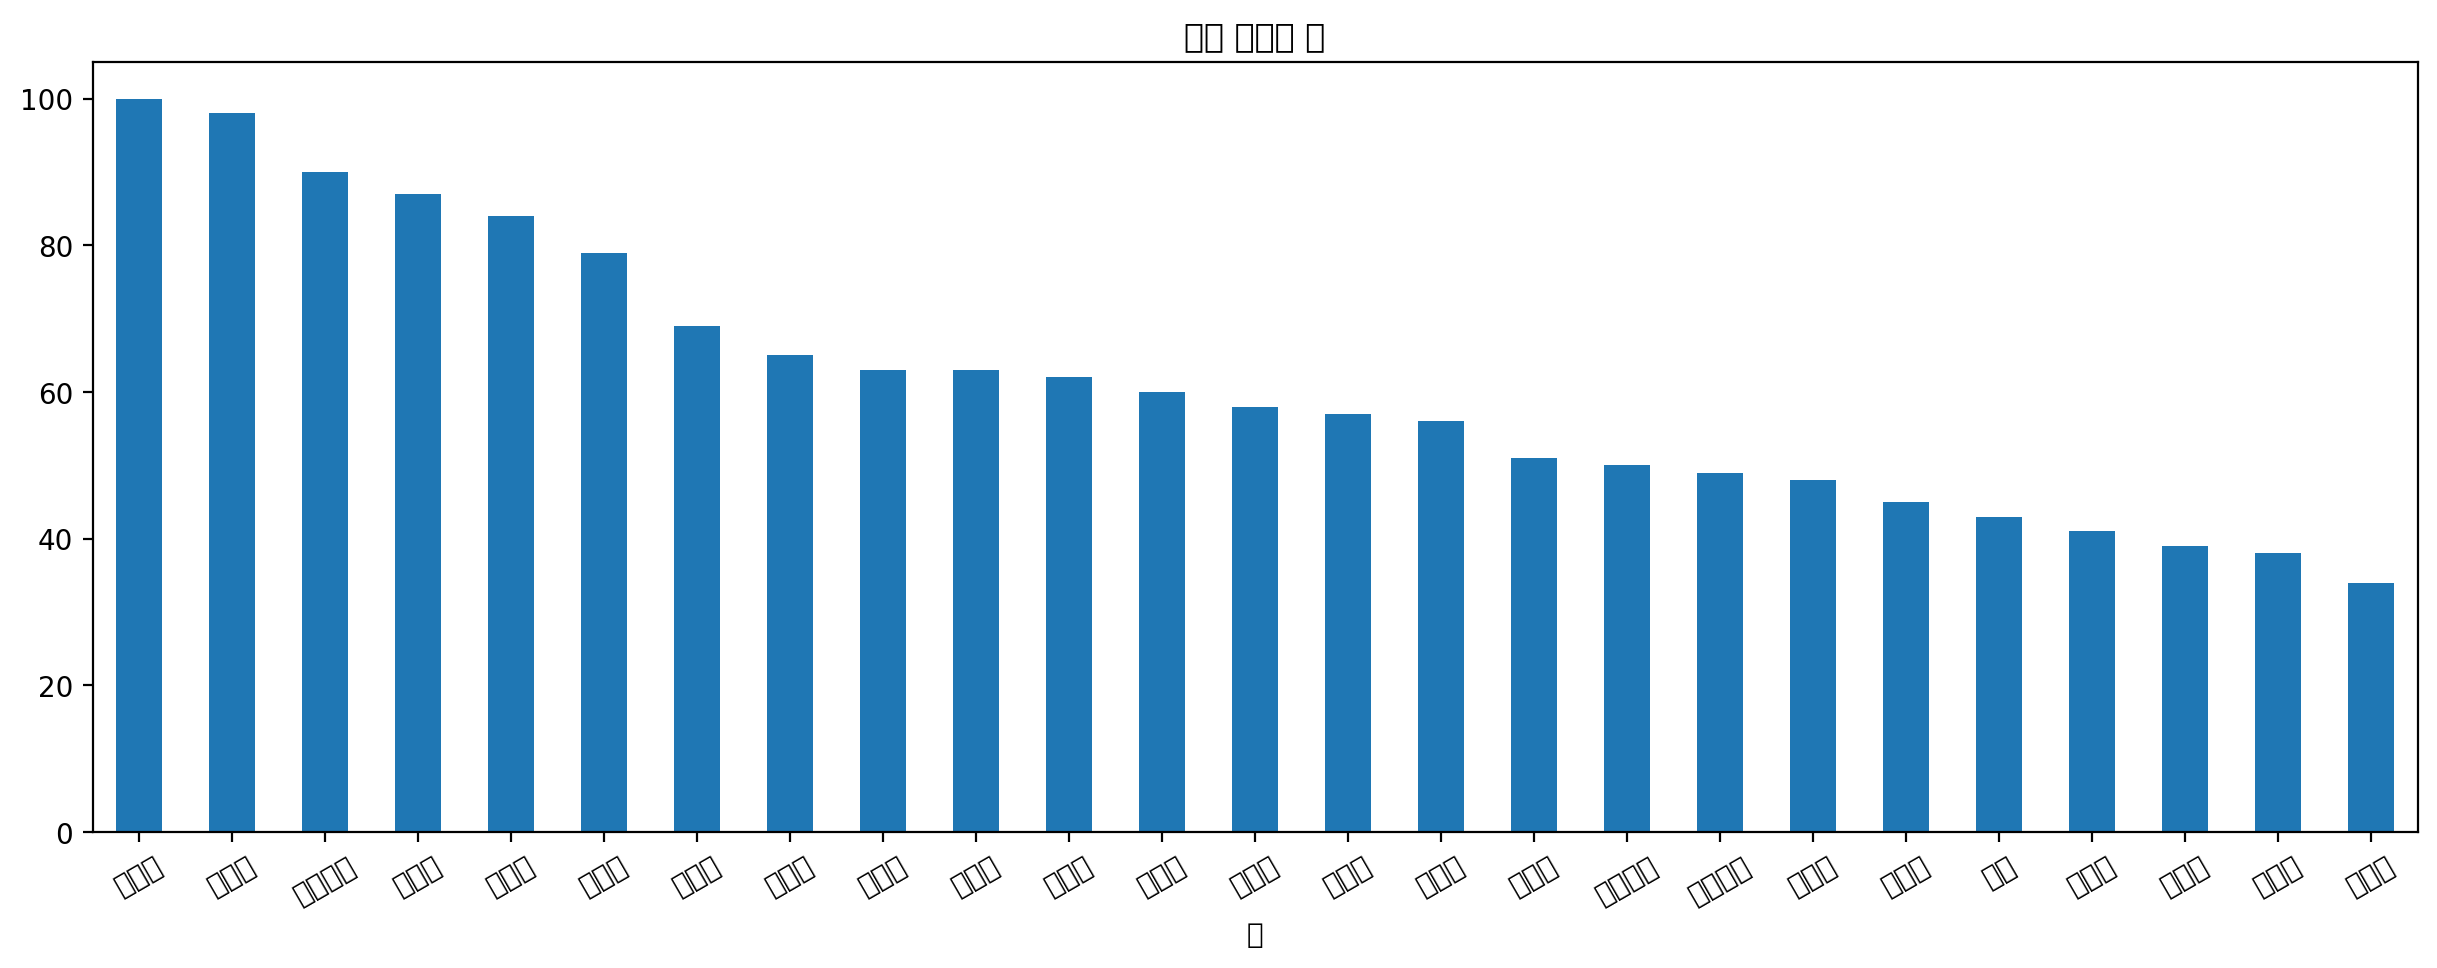

In [37]:
# Pandas로 시각화 하기
df_gu.plot(kind='bar', rot=30, figsize=(15, 5), title="구별 대여소 수")

<Axes: xlabel='구', ylabel='count'>

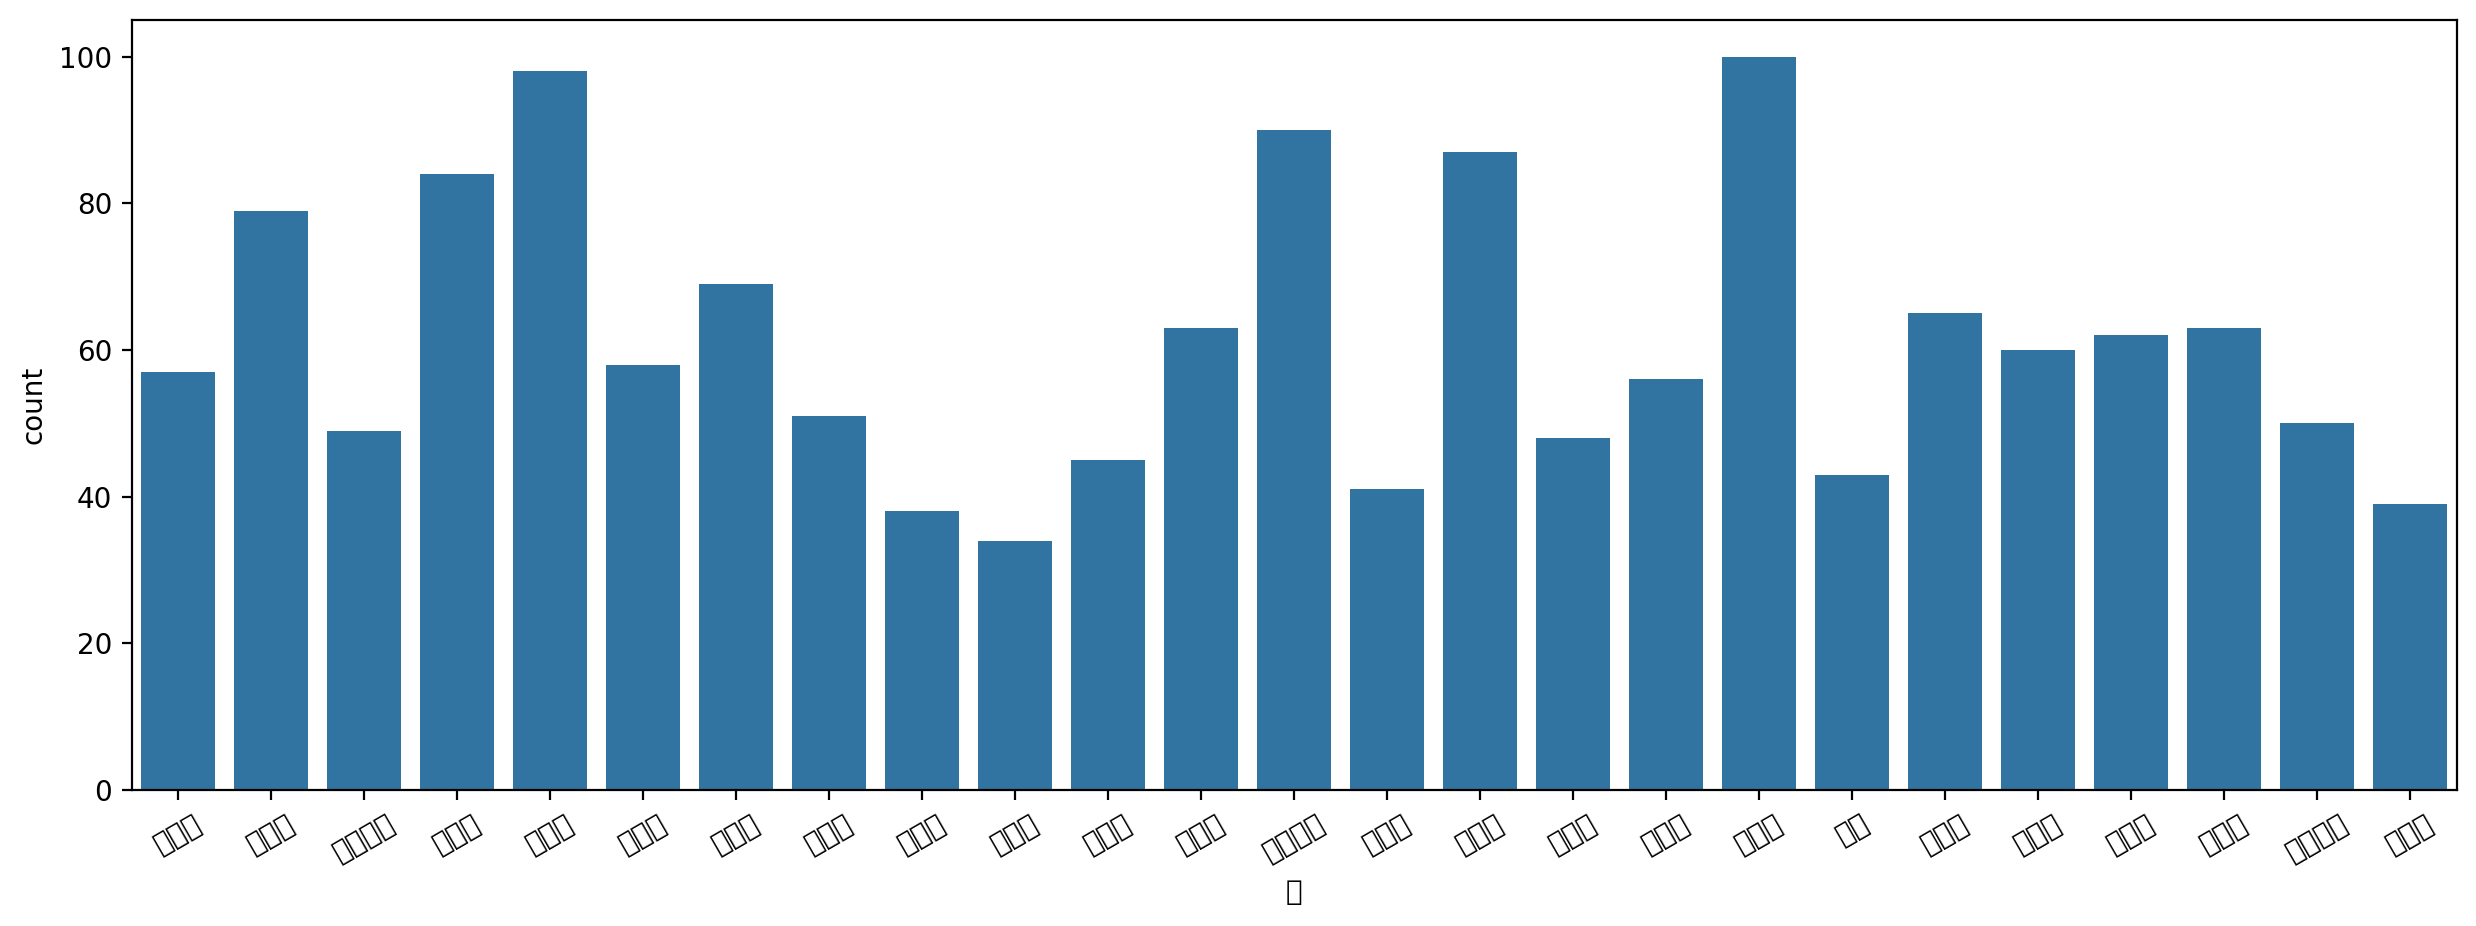

In [38]:
# 위와 같은 시각화를 seaborn 으로 보기
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.countplot(data=df, x='구')

In [39]:
# 잘못입력된 위경도로 인해 그래프가 제대로 그려지지 않는 문제를 위해 위경도 범위를 지정
geo_gu_df = df.loc[(df['위도'] > 37) & (df['경도'] > 125)]
geo_gu_df.shape

(1524, 8)

<Axes: xlabel='경도', ylabel='위도'>

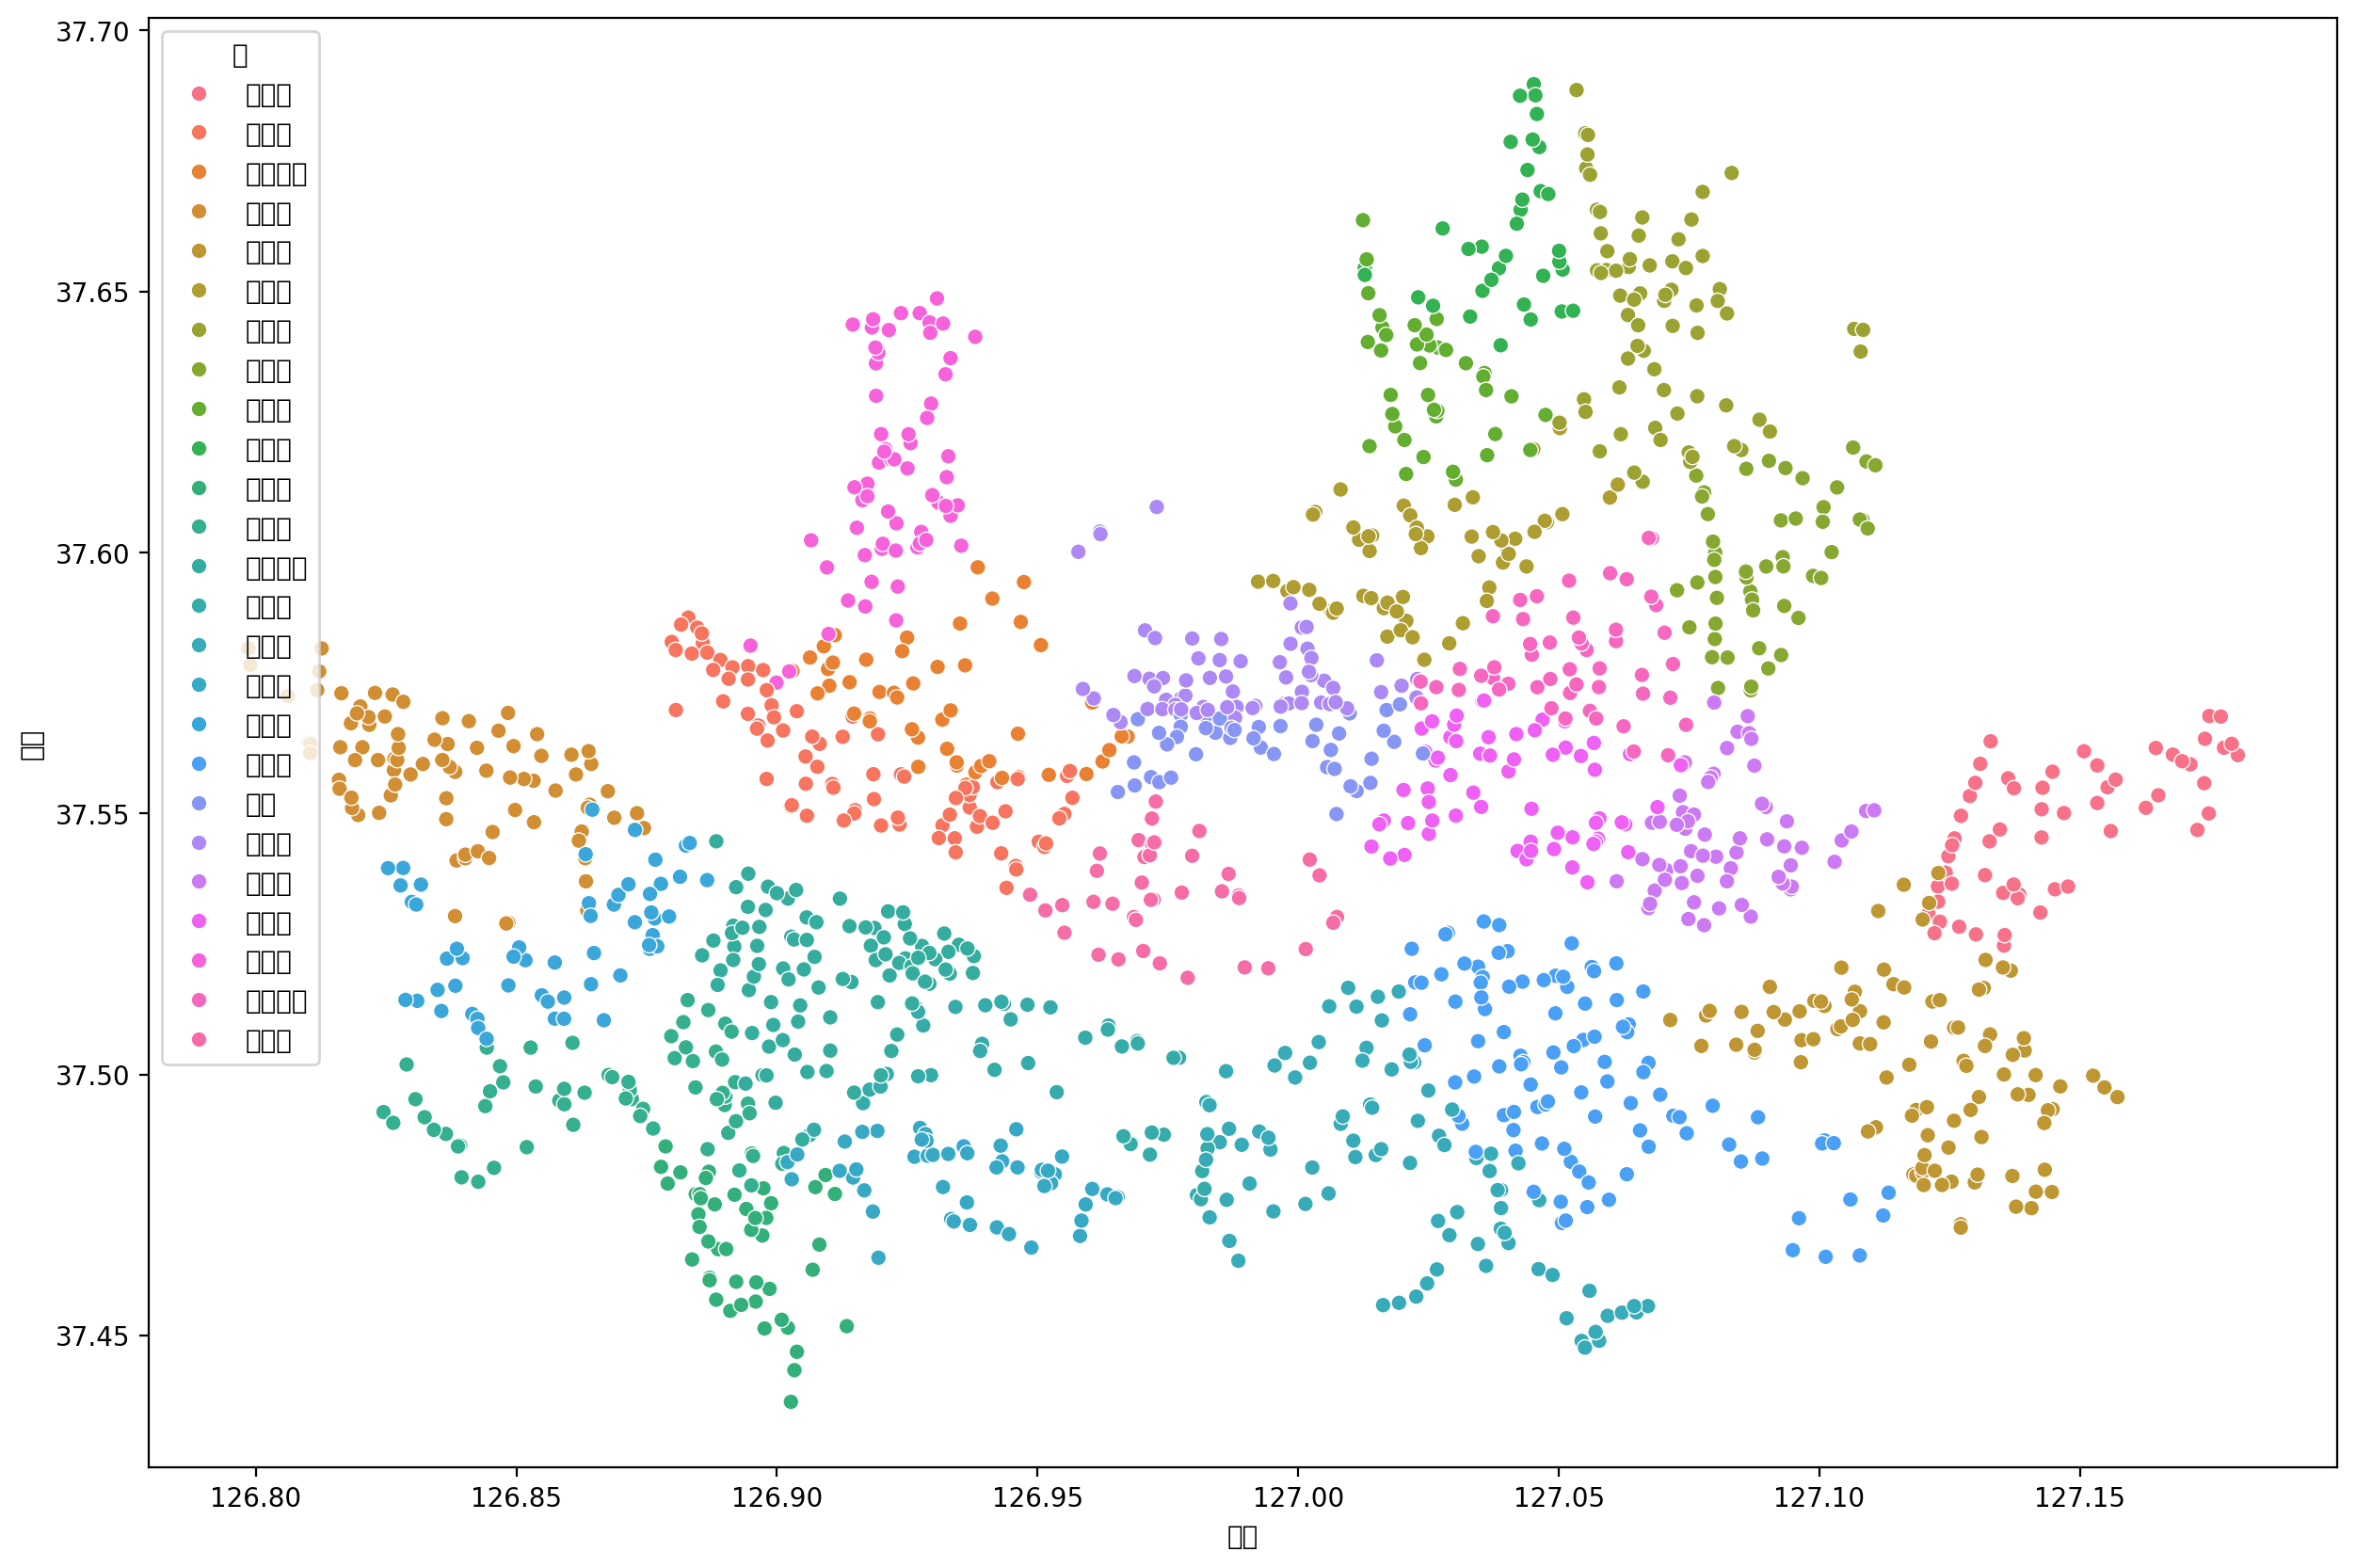

In [40]:
# 위경도에 오류가 있는 데이터를 제거한 geo_gu_df를 사용해 시각화 한다.
plt.figure(figsize=(15, 10))
sns.scatterplot(data=geo_gu_df, x='경도', y='위도', hue='구')

In [ ]:
# 위도 경도의 오류 데이터 제거를 위해 구간에 있는 데이터로 위경도의 평균을 구해온다.
df_gu_lat_long = geo_gu_df.groupby(["구"])["위도", "경도"].mean()
df_gu_lat_long.head()

In [ ]:
# 구별 대여소 수를 집계한다.
df_gu_count = pd.DataFrame(df["구"].value_counts())
df_gu_count.columns = ["대여소수"]
df_gu_count.head()

NameError: name 'df_gu_lat_long' is not defined

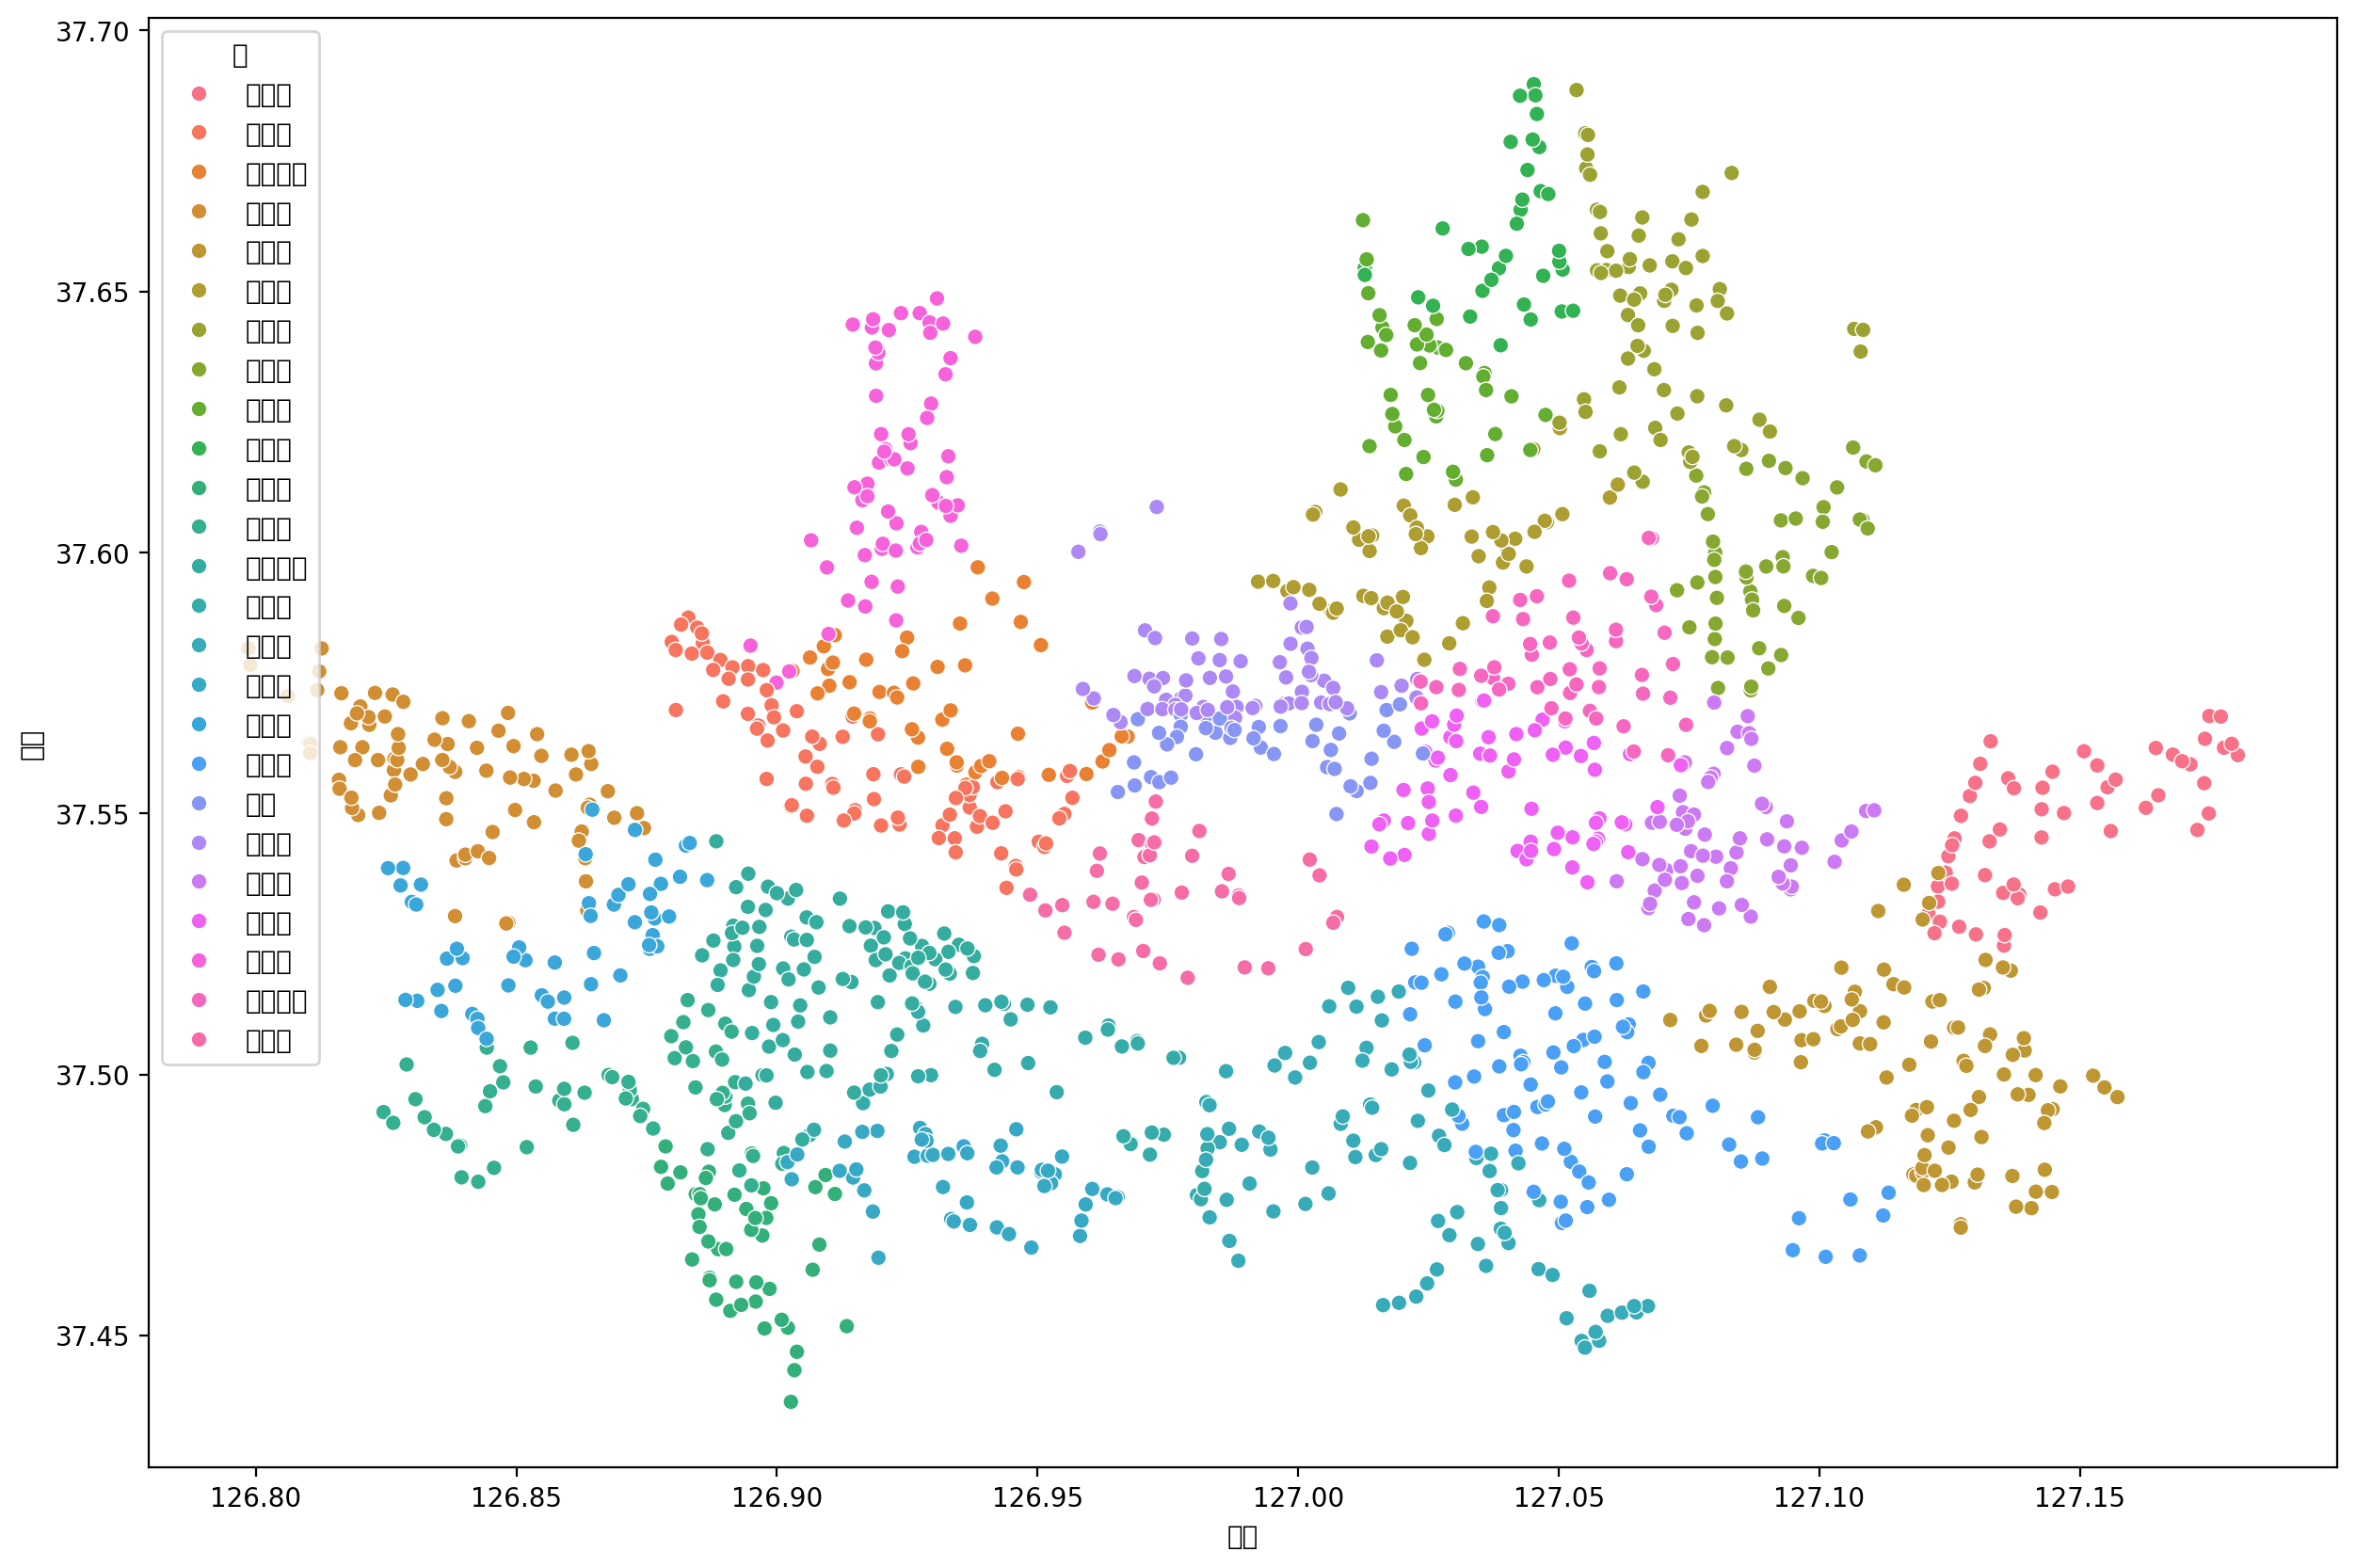

In [43]:
# 구별 대여소 수를 비교해 본다.
plt.figure(figsize=(15, 10))
sns.scatterplot(data=geo_gu_df, x='경도', y='위도', hue='구')
sns.scatterplot(data=df_gu_lat_long, x="경도", y="위도",
                size=df_gu_count["대여소수"], hue=df_gu_count["대여소수"],
                sizes=(100, 500))

## folium 으로 지도에 시각화 하기
* [folium 예제 참고](http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/)
    - 맵스타일, 히트맵, 마커 등을 커스텀하게 표현한 예제

In [42]:
%time
geo_df = geo_gu_df
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    loc_name = geo_df.loc[n, '대여소']

    icon_color = 'green'
    folium.Circle(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        popup=loc_name,
        radius=20,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
